# Importar Librerías

In [ ]:
!pip install ta

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
plt.style.use("bmh")


# Technical Analysis library
import ta 
from ta import add_all_ta_features

from datetime import timedelta

# Neural Network library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cargar la Data

In [ ]:
# S&P 500 Desde Enero 2015 a Enero 2020 tomado de Yahoo Finance

df= pd.read_csv('/content/drive/MyDrive/SPY.csv')

# Procesamiento de los datos

### Conversión de fecha

In [ ]:
df['Date'] = pd.to_datetime(df.Date)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-06,202.089996,202.720001,198.860001,199.820007,176.034042,209151400
1,2015-01-07,201.419998,202.720001,200.880005,202.309998,178.227661,125346700
2,2015-01-08,204.009995,206.160004,203.990005,205.899994,181.390289,147217800
3,2015-01-09,206.399994,206.419998,203.509995,204.250000,179.936707,158567300
4,2015-01-12,204.410004,204.600006,201.919998,202.649994,178.527176,144396100


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.shape

(1258, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:

# Configuración del índice

df.set_index('Date', inplace=True)

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Borrar los valores NaN

df.dropna(inplace=True)

# Visualizar el S&P500

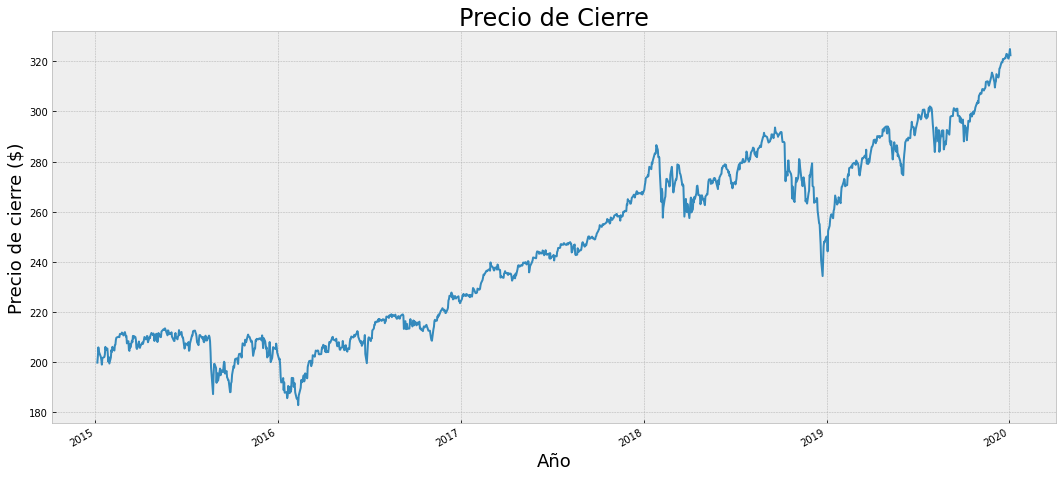

In [ ]:
#Gráfica Precio vs Año

df['Close'].plot(figsize=(18,8))
plt.title('Precio de Cierre', size =24)
plt.xlabel('Año', size=18)
plt.ylabel('Precio de cierre ($)', size=18)
plt.show()

# Agregar Indicadores Técnicos

In [ ]:
# Añadiendo los indicadores técnicos

df = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

In [ ]:

# Dropping everything else besides 'Close' and the Indicators

df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [ ]:
# Visualizando el nuevo DF con los Indicadores Técnicos


df.tail()

,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-27,322.859985,1.079870e+10,1085656700,0.105757,3.173312e+07,88.025346,2.662575,1.760237,154010.722514,3853.40702,318.791659,1.769165,316.933501,325.106263,308.760738,5.157399,0.862575,0.0,0.0,320.504001,322.016000,318.992002,0.943514,1.279096,1.0,0.0,307.130005,323.799988,315.464996,5.259773,0.943611,0.232316,3.446718,3.184742,0.261976,319.784169,315.907691,319.812191,316.365473,31.895697,...,0.682459,0.145214,24.808600,111.851018,-2.513488,32.664047,29.343527,3.320520,320.524994,315.464996,317.994995,310.384994,307.345001,298.755004,96.0,32.0,64.0,317.241147,315.149351,0.0,0.0,99.835688,76.906904,0.973008,0.991003,0.992787,44.518638,61.073286,91.446735,94.950395,-8.553265,7.428500,321.901882,2.975787,-2.040326,4.413225,-6.453551,-0.024778,-0.024781,61.575405
2019-12-30,321.079987,1.076964e+10,1035927600,0.096838,1.455443e+07,86.488155,-6.230282,1.377464,-284705.093884,3853.40702,319.118175,1.847250,317.272000,325.542298,309.001702,5.213381,0.730221,0.0,0.0,320.928000,322.429999,319.426001,0.936035,0.550595,0.0,0.0,307.130005,323.799988,315.464996,5.254161,0.836832,0.243502,3.292540,3.206302,0.086239,320.339167,316.304230,320.007237,316.714697,31.918565,...,0.571937,0.146405,24.782421,78.004450,-0.141995,32.225892,29.970329,2.255562,321.595001,315.464996,318.529999,310.414994,307.360001,298.755004,92.0,28.0,64.0,318.421739,315.149351,0.0,0.0,96.854241,67.308570,0.410453,0.794487,0.928497,43.173397,57.157689,75.250196,88.866071,-24.749804,7.251321,321.798862,2.118178,-2.995663,2.931448,-5.927111,-0.551322,-0.552847,60.684604
2019-12-31,321.859985,1.081115e+10,1093004900,0.178432,1.883525e+07,85.943193,-2.376256,1.398939,-135509.850962,3853.40702,319.577944,1.860526,317.782999,325.858853,309.707144,5.082622,0.752418,0.0,0.0,321.169333,322.579333,319.759333,0.878042,0.744912,0.0,0.0,307.130005,323.799988,315.464996,5.245713,0.883623,0.199981,3.196446,3.204330,-0.007885,320.733332,316.749999,320.292275,317.095829,31.675863,...,0.576363,0.146599,24.829487,68.107223,-0.462992,32.024225,30.494426,1.529799,321.595001,315.464996,318.529999,310.414994,307.419998,298.755004,88.0,24.0,64.0,319.389824,315.149351,0.0,0.0,85.435432,69.126887,0.451727,0.611729,0.799073,42.534019,58.475211,81.274077,82.657003,-18.725923,6.819057,321.803857,1.491496,-2.687346,1.807689,-4.495035,0.242929,0.242635,61.074954
2020-01-02,324.869995,1.086930e+10,1152156100,0.171860,4.157960e+07,86.057580,10.253822,2.065658,691835.103412,3853.40702,320.184882,1.977476,318.548999,326.253609,310.844389,4.837315,0.910209,0.0,0.0,321.602333,323.171336,320.033330,0.975741,1.541318,1.0,0.0,310.320007,324.890015,317.605011,4.573867,0.998626,0.178685,3.324846,3.228434,0.096413,321.362498,317.284999,320.996540,317

In [ ]:
df.shape

(1258, 84)

In [ ]:
# Usaremos los últimos 1000 días de datos para obtener una representación más precisa del clima actual del mercado

df = df.tail(1000)

In [ ]:
df.describe()

,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,255.473650,7.292336e+09,-3.941761e+08,0.122508,-1.164916e+07,52.270500,0.193157,0.174109,-6.599893e+04,2382.307440,254.292428,2.521178,254.306075,260.490620,248.121529,4.842160,0.628425,0.070000,0.045000,254.825864,257.085987,252.565741,1.779246,0.742250,0.383000,0.130000,246.798240,259.865101,253.331671,5.121120,0.696439,1.507764,0.784799,0.762717,0.022082,254.773503,253.968019,254.789154,254.004355,22.656566,...,0.152920,0.042776,24.898799,41.055257,-0.193145,10.161440,9.913898,0.247542,254.442626,252.804561,253.623593,250.802571,250.778921,248.173346,68.416000,38.968000,29.448000,252.511000,255.094950,0.047000,0.04600,5.363463e+01,57.041786,0.573316,5.731263e-01,5.727478e-01,13.301777,57.425868,67.516606,67.443977,-32.483394,1.676668,254.689477,0.613356,-1.216682,-1.193064,-0.023618,0.056774,0.053498,27.851887
std,33.016254,2.280901e+09,9.526205e+08,0.161261,8.275191e+07,15.503311,6.049564,1.670858,1.781605e+06,700.282207,32.746630,1.211616,32.652339,33.888310,31.803187,2.851288,0.318638,0.255275,0.207408,32.875172,33.149162,32.648057,0.975778,0.647184,0.486362,0.336472,31.709872,33.668186,32.493571,2.838503,0.279964,1.679654,1.961392,1.820747,0.660405,32.822676,32.538325,32.763977,32.456285,8.248323,...,0.327347,0.106903,1.556239,107.790523,2.707543,26.334032,25.714767,9.144327,32.830152,32.338241,32.535818,31.776648,31.939611,31.440999,32.689073,32.493057,57.797126,32.890934,32.796726,0.211745,0.20959,4.290993e+01,11.471763,0.358897,3.250549e-01,3.118354e-01,19.425350,10.033647,28.688073,26.503621,28.688073,5.131810,32.910163,2.561433,8.297074,6.869301,4.185383,0.807069,0.808480,16.522997
min,182.860001,1.658318e+09,-2.742146e+09,-0.294474,-6.474199e+08,9.863398,-35.064851,-11.553934,-1.610684e+07,1383.924327,188.329782,0.870013,188.390000,194.028707,180.496464,0.945422,-0.473078,0.000000,

# Scaling

#### Ajustando las escala de los precios de cierre por separado

Utilizando RobustScaler para escalar los datos buscando que los valores atípicos extremos tengan poco efecto

In [ ]:
close_scaler = RobustScaler()

close_scaler.fit(df[['Close']])

RobustScaler()

In [ ]:
scaler = RobustScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

df.tail(10)

,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-19,1.091562,0.753435,0.802274,0.514651,0.898166,0.911931,0.092007,0.472443,0.314070,1.622691,0.985271,-0.058674,0.995043,0.871074,1.054710,-0.006105,0.563161,0.0,0.0,1.004780,0.963143,1.069543,-0.302361,0.940763,1.0,0.0,1.090964,0.898610,1.010314,0.038469,0.448168,-0.017577,0.837906,0.788804,0.534336,0.991592,0.988902,1.010484,0.978098,0.430856,...,0.255652,0.500467,0.278364,0.552003,-1.277779,0.415745,0.436240,0.043564,1.017843,1.028911,1.021814,0.807124,0.795074,0.687198,0.321429,-0.400000,0.440367,0.981328,1.031256,0.0,0.0,0.373469,0.946347,0.544449,0.530335,0.405694,0.694157,0.373873,0.480941,0.429581,0.480941,0.744960,1.022639,1.081268,0.999224,0.772102,0.790409,0.506216,0.505591,1.091562
2019-12-20,1.088471,0.754986,0.712718,0.438203,0.677319,1.343301,0.129270,0.980082,0.216607,1.622691,1.003945,-0.019635,1.004597,0.882707,1.061616,0.025278,0.422096,0.0,0.0,1.015540,0.976071,1.077994,-0.216250,0.625023,1.0,0.0,1.090964,0.915594,1.019473,0.131336,0.268902,-0.066174,0.865020,0.830076,0.497914,1.005567,0.997071,1.021039,0.987485,0.529707,...,0.560453,0.528228,0.288203,0.440148,-1.263139,0.422347,0.424462,0.100399,1.026821,1.037982,1.030775,0.828991,0.814441,0.687198,0.250000,0.333333,0.000000,1.001285,1.031256,0.0,0.0,0.400821,0.894958,0.489010,0.618462,0.542308,0.743287,0.319634,0.314301,0.405962,0.314301,0.782432,1.033913,0.809873,1.849626,1.053796,2.091746,-0.151917,-0.152081,1.088471
2019-12-23,1.097382,0.748390,0.744970,0.248236,0.629214,1.664868,0.128612,1.944213,-0.106933,1.628092,1.019989,-0.094572,1.013968,0.894407,1.068050,0.059308,0.393901,0.0,0.0,1.028277,0.987090,1.092494,-0.269383,0.599634,1.0,0.0,1.090964,0.915594,1.019473,0.129020,0.345002,-0.208560,0.887111,0.867958,0.454674,1.019436,1.005268,1.031343,0.996838,0.621498,...,1.243901,0.554796,0.244667,0.392987,-0.338414,0.452832,0.422774,0.202974,1.032534,1.037982,1.033627,0.837021,0.823997,0.687198,0.321429,0.266667,0.073394,1.024262,1.031256,0.0,0.0,0.414498,0.950194,0.544449,0.618462,0.611303,0.793343,0.135037,0.355392,0.395487,0.355392,0.803415,1.051578,0.798951,1.450318,1.184401,1.010310,0.140620,0.140627,1.097382
2019-12-24,1.097564,0.748746,0.757307,0.092868,0.516627,1.553912,-0.194409,1.296194,-0.012334,1.628202,1.027577,-0.181906,1.021147,0.906108,1.069756,0.117037,0.297723,0.0,0.0,1.042035,0.998521,1.108652,-0.343488,0.412646,1.0,0.0,1.090964,0.915594,1.019473,0.127251,0.346557,-0.298902,0.888853,0.898646,0.362952,1.029024,1.011898,1.040090,1.005511,0.696515,...,0.985063,0.577272,0.181787,0.269032,-0.885647,0.497292,0.434333,0.310042,1.039155,1.037982,1.036931,0.876057,0.858967,0.702587,0.321429,0.200000,0.110092,1.044022,1.031256,0.0,0.0,0.421336,0.951368,0.544449,0.618462,0.641770,0.8

# Visualizando los Precios con la escala

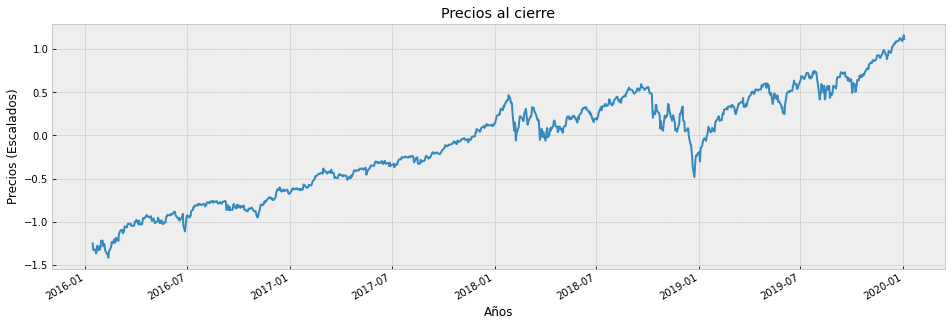

In [ ]:
df['Close'].plot(figsize=(16,5))
plt.title("Precios al cierre")
plt.xlabel("Años")
plt.ylabel("Precios (Escalados)")
plt.show()

# Funciones auxiliares para preparar la data para Red LSTM

Esta función divide una secuencia de tiempo multivariante. Los valores de entrada serán los precios de cierre y los indicadores técnicos. Los valores X contendrán los precios de cierre anteriores y los indicadores. Las y contendrán los valores objetivo ( sólo los precios de cierre futuros).

In [ ]:
def split_sequence(seq, n_steps_in, n_steps_out):
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        if out_end > len(seq):
            break
        seq_x, seq_y = seq[i:end, :], seq[end:out_end, 0]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

Evaluar la red

In [ ]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(16,5))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(16,5))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

Construir el cuerpo de nuestra Red

In [ ]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    
    # Crea un número específico de capas ocultas para un RNN
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

Crea un DF con valores predichos para un rango específico de fechas.

In [ ]:
def validater(n_per_in, n_per_out):
   
    predictions = pd.DataFrame(index=df.index, columns=[df.columns[0]])

    for i in range(1, len(df)-n_per_in, n_per_out):
        
        x = df[-i - n_per_in:-i]
        yhat = model.predict(np.array(x).reshape(1, n_per_in, n_features))

        yhat = close_scaler.inverse_transform(yhat)[0]

      
        pred_df = pd.DataFrame(yhat, 
                               index=pd.date_range(start=x.index[-1]+timedelta(days=1), 
                                                   periods=len(yhat), 
                                                   freq="B"),
                               columns=[x.columns[0]])

        
        predictions.update(pred_df)
        
    return predictions

Error cuadrático medio ( RMSE )

In [ ]:
def val_rmse(df1, df2):
   
    df = df1.copy()
    

    df['close2'] = df2.Close
    df.dropna(inplace=True)
    df['diff'] = df.Close - df.close2  
   
    rms = (df[['diff']]**2).mean()
    return float(np.sqrt(rms))

# Dividiendo la data

In [ ]:
# Número de períodos mirando hacia atrás para aprender 
n_per_in  = 270

# Número de períodos a predecir 
n_per_out = 180

#Funciones  
n_features = df.shape[1]

# Dividir los datos en secuencias 
X, y = split_sequence(df.to_numpy(), n_per_in, n_per_out)

# Modelado - LSTM (RNN)

Creando la Red Neuronal

In [ ]:
# Instalación del modelo
model = Sequential()

# Activación
activ = "tanh"

# Capa entrada
model.add(LSTM(270, 
               activation=activ, 
               return_sequences=True, 
               input_shape=(n_per_in, n_features)))

# Capas ocultas
layer_maker(n_layers=2, 
            n_nodes=180, 
            activation=activ,
            drop=1,
            d_rate=.1)

# Capas ocultas final
model.add(LSTM(270, activation=activ))

# Capa salida
model.add(Dense(n_per_out))

# Resumen
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 270, 270)          383400    
                                                                 
 lstm_1 (LSTM)               (None, 270, 180)          324720    
                                                                 
 dropout (Dropout)           (None, 270, 180)          0         
                                                                 
 lstm_2 (LSTM)               (None, 270, 180)          259920    
                                                                 
 dropout_1 (Dropout)         (None, 270, 180)          0         
                                                                 
 lstm_3 (LSTM)               (None, 270)               487080    
                                                                 
 dense (Dense)               (None, 180)               4

In [ ]:
# Compilar los datos con especificaciones seleccionadas
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Adaptación y formación de la RNN

In [ ]:
res = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.8)

Epoch 1/100
4/4 [==============================] - 26s 6s/step - loss: 0.0507 - accuracy: 0.0000e+00 - val_loss: 0.1434 - val_accuracy: 0.0045
Epoch 2/100
4/4 [==============================] - 18s 5s/step - loss: 0.0164 - accuracy: 0.0091 - val_loss: 0.1496 - val_accuracy: 0.0068
Epoch 3/100
4/4 [==============================] - 18s 5s/step - loss: 0.0097 - accuracy: 0.2000 - val_loss: 0.1495 - val_accuracy: 0.0091
Epoch 4/100
4/4 [==============================] - 18s 5s/step - loss: 0.0071 - accuracy: 0.0545 - val_loss: 0.1524 - val_accuracy: 0.0113
Epoch 5/100
4/4 [==============================] - 18s 5s/step - loss: 0.0045 - accuracy: 0.0364 - val_loss: 0.1547 - val_accuracy: 0.0068
Epoch 6/100
4/4 [==============================] - 18s 5s/step - loss: 0.0036 - accuracy: 0.0727 - val_loss: 0.1530 - val_accuracy: 0.0091
Epoch 7/100
4/4 [==============================] - 18s 5s/step - loss: 0.0033 - accuracy: 0.1091 - val_loss: 0.1536 - val_accuracy: 0.0045
Epoch 8/100
4/4 [======

# Visualización de los Accuracy y Loss

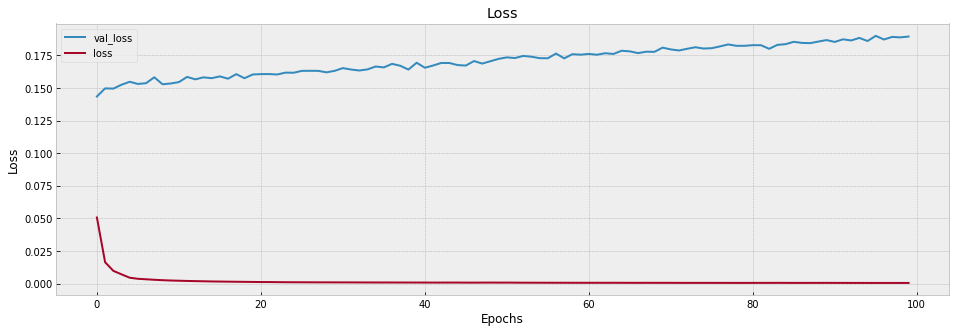

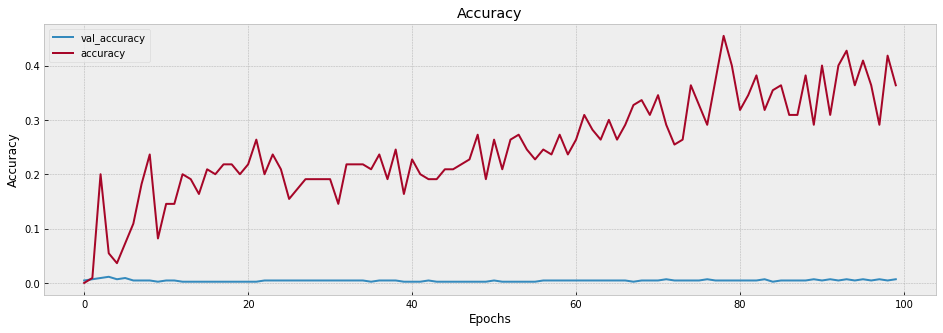

In [ ]:
visualize_training_results(res)

# Visualización de las predicciones

### Validación del modelo

Diferencia entre los precios de cierre reales y los precios previstos


RMSE: 26.8564444536508


ConversionError: ignored

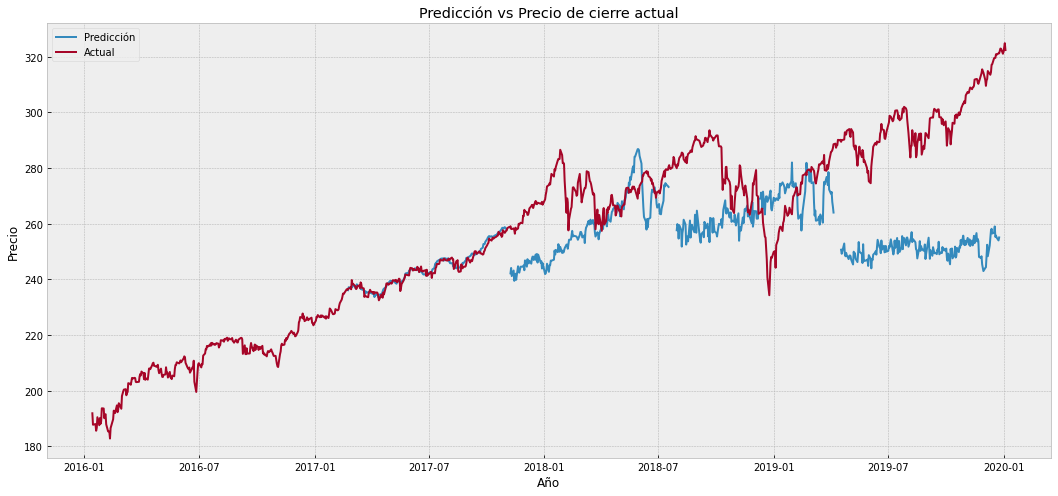

In [ ]:
# Transformar los valores a su precio original
actual = pd.DataFrame(close_scaler.inverse_transform(df[["Close"]]), 
                      index=df.index, 
                      columns=[df.columns[0]])

# Valores predichos 
predictions = validater(n_per_in, n_per_out)

# Imprimir el RMSE
print("RMSE:", val_rmse(actual, predictions))
    
# Plotting
plt.figure(figsize=(18,8))

# Plotting those predictions
plt.plot(predictions, label='Predicción')

# Plotting the actual values
plt.plot(actual, label='Actual')

plt.title(f"Predicción vs Precio de cierre actual")
plt.xlabel("Año")
plt.ylabel("Precio")
plt.legend()
plt.xlim('2017-12', '2019-12')
plt.show()

# Predecir / pronosticar los precios futuros

                 Close
2020-01-06  291.710938
2020-01-07  298.270477
2020-01-08  308.946564
2020-01-09  314.597870
2020-01-10  304.766541
...                ...
2020-09-07  254.263000
2020-09-08  246.362869
2020-09-09  238.467026
2020-09-10  250.566925
2020-09-11  226.123581

[180 rows x 1 columns]


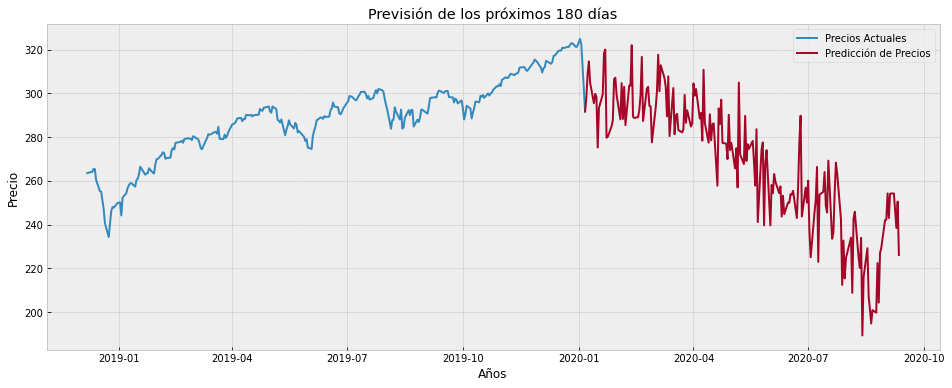

In [ ]:
# Predicción de los días más recientes desde el DF original
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features))

# Transformar los valores predichos a su formato original
yhat = close_scaler.inverse_transform(yhat)[0]

# Creando un DF de los precios previstos
preds = pd.DataFrame(yhat, 
                     index=pd.date_range(start=df.index[-1]+timedelta(days=1), 
                                         periods=len(yhat), 
                                         freq="B"), 
                     columns=[df.columns[0]])

# Número de períodos atrás 
pers = n_per_in

# Transformar los valores reales a su precio original
actual = pd.DataFrame(close_scaler.inverse_transform(df[["Close"]].tail(pers)), 
                      index=df.Close.tail(pers).index, 
                      columns=[df.columns[0]]).append(preds.head(1))

# Imprimir los precios previstos
print(preds)

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Precios Actuales")
plt.plot(preds, label="Predicción de Precios")
plt.ylabel("Precio")
plt.xlabel("Años")
plt.title(f"Previsión de los próximos {len(yhat)} días")
plt.legend()
plt.show()

In [ ]:
# Guardar como archivo CSV
preds.to_csv('Prediccion_LSTM.csv', encoding='utf-8', mode='a', header=False, index=False)